In [1]:
# 1.a. Sa se stabileasca:

# - numarul de angajati
# - numar si tipul informatiilor (proprietatilor) detinute pentru un angajat
# - numarul de angajati pentru care se detin date complete
# - valorile minime, maxime, medii pentru fiecare proprietate
# - in cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate
# - daca sunt valori lipsa si cum se poate rezolva aceasta problema

# 1.b. Sa se vizualizeze:

# - distributia salariilor acestor angajati pe categorii de salar
# - distributia salariilor acestor angajati pe categorii de salar si echipa din care fac parte
# angajatii care pot fi considerati "outlieri"


In [19]:
import pandas as pd

df_employees = pd.read_csv('data/employees.csv',delimiter=',',header='infer')

# numarul de angajati
no_employees = len(df_employees)
print('Numar angajati: ' + str(no_employees) + '\n')

Numar angajati: 1000



In [20]:
# numar si tipul informatiilor (proprietatilor) detinute pentru un angajat
print('Numar informatii: ', len(df_employees.columns))
print('Tipul informatiilor:', list(df_employees.columns), '\n')

Numar informatii:  8
Tipul informatiilor: ['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary', 'Bonus %', 'Senior Management', 'Team'] 



In [21]:
# numarul de angajati pentru care se detin date complete
print('Numar angajati cu date complete: ', df_employees.dropna().shape[0], '\n')

Numar angajati cu date complete:  764 



In [22]:
# valorile minime, maxime, medii pentru fiecare proprietate
print(df_employees.describe().loc[['min', 'max', 'mean']], '\n')

          Salary    Bonus %
min    35013.000   1.015000
max   149908.000  19.944000
mean   90662.181  10.207555 



In [23]:
# in cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate
print('Numar valori posibile:')
for col in df_employees.select_dtypes(include=['object']).columns:
    print(col, len(df_employees[col].unique()))
print()

Numar valori posibile:
First Name 201
Gender 3
Start Date 972
Last Login Time 720
Senior Management 3
Team 11



In [24]:
# daca sunt valori lipsa si cum se poate rezolva aceasta problema
print('Valori lipsa:', df_employees.isnull().sum().max())
print('Rezolvare prin stergerea randurilor incomplete')
df_employees = df_employees.dropna()
print(len(df_employees))

Valori lipsa: 145
Rezolvare prin stergerea randurilor incomplete
764


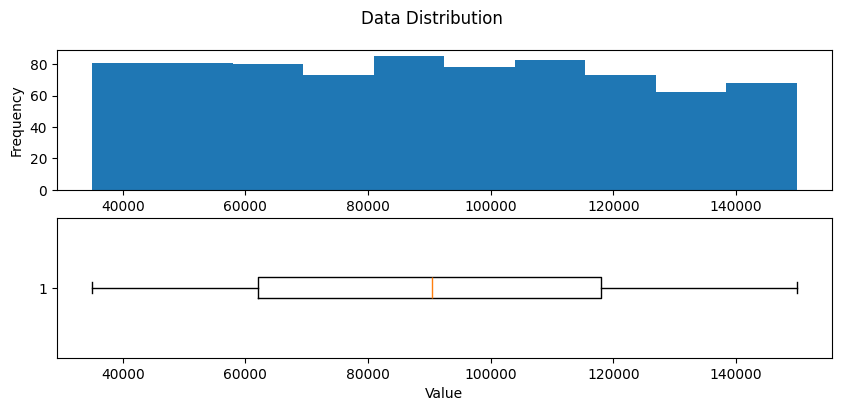

In [25]:
# distributia salariilor acestor angajati pe categorii de salar
from matplotlib import pyplot as plt

# Create a function that we can re-use
def show_distribution(var_data):
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    plt.suptitle('Data Distribution')

    # Show the figure
    plt.show()

show_distribution(df_employees['Salary'])

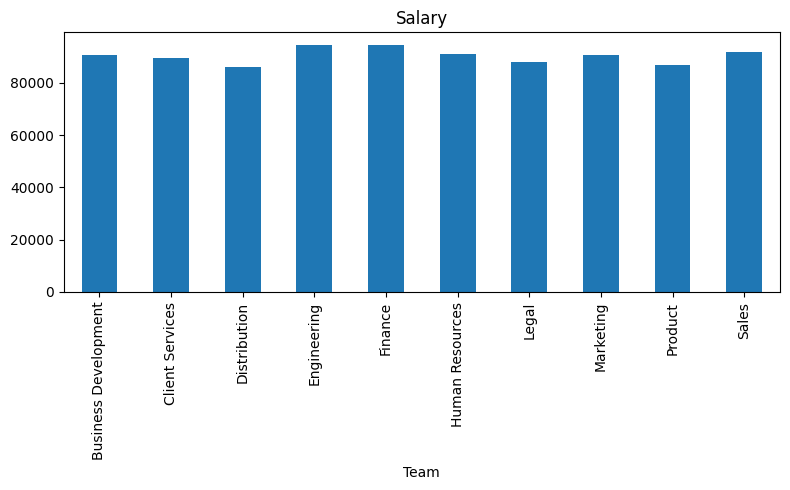

In [26]:
# distributia salariilor acestor angajati pe categorii de salar si echipa din care fac parte
import matplotlib.pyplot as plt

# Crearea unei figuri și a axelor
fig, ax = plt.subplots(figsize=(8, 5))

# Trasarea diagramului de bare pentru salariile angajaților în funcție de echipa
df_employees.groupby('Team')['Salary'].mean().plot(kind='bar', ax=ax)

# Adăugarea de titluri și etichete
plt.title('Salary')
plt.xlabel('Team')

# Afișarea graficului
plt.tight_layout()
plt.show()

# df_employees.boxplot(column='Salary', by='Team', figsize=(8,5))
# plt.xticks(rotation=45)


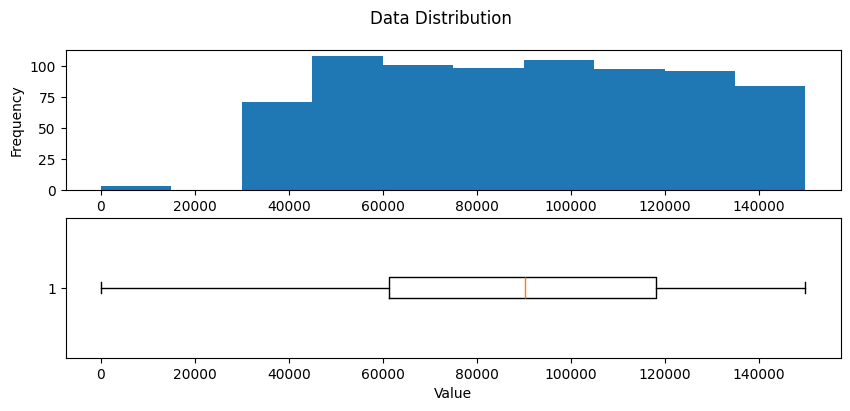

In [27]:
# angajatii care pot fi considerati "outlieri"
df_employees.at[0, 'Salary'] = 1
df_employees.at[1, 'Salary'] = 1
df_employees.at[2, 'Salary'] = 1
show_distribution(df_employees['Salary'])